### <font color=black> IMPORT:: <font color=blue> **py modules** </font> </font>

In [10]:
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
#
%matplotlib inline
# %matplotlib notebook
#
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
#
# PD=os.getcwd(); PD


### <font color=blue> Choose:: <font color=red> **Folder & Scenario**  </font>

In [11]:
wf='wf_1e'
ssp='ssp119'

# folder='full_sample_workflows'
# pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
# pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/001_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

folder='dist_workflows'
pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/002_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

flistG=sorted(os.listdir(pathG)); print(flistG)
print('\n')
flistP=sorted(os.listdir(pathP)); print(flistP)

['glaciers-ipccar6-gmipemuglaciers-ssp119_localsl.nc', 'icesheets-ipccar6-ismipemuicesheet-ssp119_AIS_localsl.nc', 'icesheets-ipccar6-ismipemuicesheet-ssp119_GIS_localsl.nc', 'landwaterstorage-ssp-landwaterstorage-ssp119_localsl.nc', 'oceandynamics-tlm-oceandynamics-ssp119_localsl.nc', 'total-workflow.nc', 'verticallandmotion-NZ_InsarGPS-verticallandmotion_localsl.nc']


['nzOG.ssp119.NZInsarGPS.NZInsarGPS.verticallandmotion_localsl.nc', 'nzOG.ssp119.emuAIS.emulandice.AIS_localsl.nc', 'nzOG.ssp119.emuGrIS.emulandice.GrIS_localsl.nc', 'nzOG.ssp119.emuglaciers.emulandice.glaciers_localsl.nc', 'nzOG.ssp119.lws.ssp.landwaterstorage_localsl.nc', 'nzOG.ssp119.ocean.tlm.sterodynamics_localsl.nc', 'nzOG.ssp119.total.workflow.wf1e.local.nc']


## <font color=blue> Choose::  <font color=red> **File & Variable** </font>  

In [12]:
fileG='total-workflow.nc'
fileP='nzOG.{arg0}.total.workflow.wf{arg1}.local.nc'.format(arg0=ssp,arg1=wf.split('_')[1])

var='sea_level_change'

# labels
EXP_G=pathG.split('/')[3].split('_')[0]; print(EXP_G)
EXP_P=pathP.split('/')[4].split('-')[1]; print(EXP_P)
EXP_file=fileP;                          print(EXP_file)

ggg46
pk695
nzOG.ssp119.total.workflow.wf1e.local.nc


## <font color=blue> List::  <font color=red> **Data Details** </font>  

In [13]:
d_ncG=xr.open_dataset(pathG+fileG);  
d_ncP=xr.open_dataset(pathP+fileP);
d_ncP

<xarray.Dataset>
Dimensions:           (quantiles: 107, years: 9, locations: 7435)
Coordinates:
  * years             (years) int64 2020 2030 2040 2050 2060 2070 2080 2090 2100
  * locations         (locations) int64 2000000000 2000000010 ... 2000074340
  * quantiles         (quantiles) float64 0.0 0.001 0.005 ... 0.995 0.999 1.0
Data variables:
    sea_level_change  (quantiles, years, locations) float32 ...
    lat               (locations) float64 ...
    lon               (locations) float64 ...
Attributes:
    description:  Total sea-level change for workflow
    history:      Created Mon Mar 27 17:59:49 2023
    source:       FACTS: Post-processed total among available contributors: /...

In [14]:
# Find the common locations
idx=0
# latG=np.round(d_ncG['lat'][idx].values,4); lonG=np.round(d_ncG['lon'][idx].values,4)
latG=d_ncG['lat'][idx].values; lonG=d_ncG['lon'][idx].values
latP=d_ncP['lat'][idx].values; lonP=d_ncP['lon'][idx].values
print('lonP=',lonP,'latP=',latP,)
print('lonG=',lonG,'latG=',latG,)
print( '\n' )
print('d_ncG=',d_ncG[var].shape)
print('d_ncP=',d_ncP[var].shape)
print( '\n' )

lonP= 173.11751 latP= -34.740926
lonG= 173.11751 latG= -34.740926


d_ncG= (107, 9, 7435)
d_ncP= (107, 9, 7435)




In [15]:
print('G years  '+str(d_ncG['years'].values)+'\n')
print('P years  '+str(d_ncP['years'].values)+'\n')

G years  [2020 2030 2040 2050 2060 2070 2080 2090 2100]

P years  [2020 2030 2040 2050 2060 2070 2080 2090 2100]



## <font color=blue> Xtract:: </font>  

### <font color=blue> YEAR:: <font color=red> **index** </font>

In [16]:
yrST=2020; yrEN=2100
yr=np.arange(yrST, yrEN+1, 10)
print('Years to select='+str(yr)+'\n')

yrIDX_G=np.searchsorted(d_ncG['years'].values, yr)
yrIDX_P=np.searchsorted(d_ncP['years'].values, yr)

print('Idx G year'+str(d_ncG['years'][yrIDX_G].values)+'\n')
print('Idx P year'+str(d_ncP['years'][yrIDX_P].values)+'\n')

Years to select=[2020 2030 2040 2050 2060 2070 2080 2090 2100]

Idx G year[2020 2030 2040 2050 2060 2070 2080 2090 2100]

Idx P year[2020 2030 2040 2050 2060 2070 2080 2090 2100]



### <font color=blue> Percentile:: <font color=red> **index** </font>

In [17]:
ptile=[5,17,50,83,95]

ptileIDX_G=np.searchsorted(d_ncG['quantiles'].values*100, ptile)
ptileIDX_P=np.searchsorted(d_ncP['quantiles'].values*100, ptile)

# DUM1=ptileIDX_G; DUM2=d_ncG['quantiles'][ptileIDX_G].values*100
# for pid, pt in zip(DUM1, DUM2):
#     print(f"index {pid} has percentile value {pt}")

### <font color=blue> PLOT:: <font color=red> **1D Slice** </font>

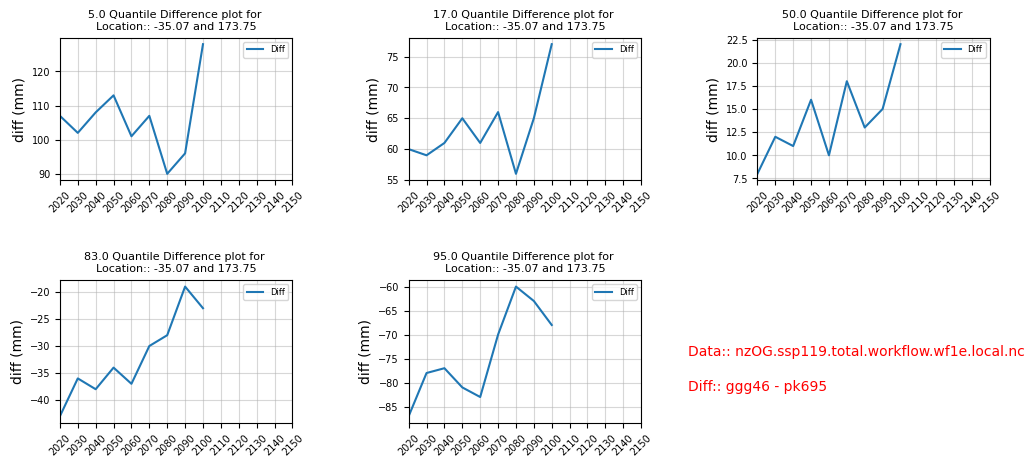

In [18]:
loc=200 #Location:: choose from 0 to 7434           
latP=d_ncP['lat'][loc].values
lonP=d_ncP['lon'][loc].values

# Get plot Variables
slcG=d_ncG[var][ptileIDX_G, yrIDX_G, loc]
slcP=d_ncP[var][ptileIDX_P, yrIDX_P, loc]
diff=slcG-slcP

xx=d_ncG['years'][yrIDX_G].values

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))

for i, pp in enumerate(ptileIDX_G):
    
    row, col = divmod(i, 3)
    ax = axs[row, col]
    
    yy1=diff[i,:]
    ax.plot(xx, yy1, label='Diff')
    
    ax.set_xlim(2020, 2150); ax.set_xticks(range(2020, 2160, 10))
    ax.tick_params(axis='x', labelrotation=45,labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.grid(alpha=0.5)
    ax.set_ylabel('diff (mm)'); #ax.set_xlabel('Years')
    
    LAT=str(np.round(latP,2)); LON=str(np.round(lonP,2))
    QUANT=str(d_ncP['quantiles'][pp].values*100)
    ax.set_title(QUANT+' Quantile Difference plot for \n'+'Location:: '+LAT+' and '+LON,fontsize=8)
    ax.legend(fontsize=6)

ax.text(1.2, .5, 'Data:: '+EXP_file, fontsize=10, color='red', transform=ax.transAxes, ha='left', va='center')
ax.text(1.2, .25, 'Diff:: '+EXP_G+' - '+ EXP_P, fontsize=10, color='red', transform=ax.transAxes, ha='left', va='center')
axs[1, 2].remove()

plt.subplots_adjust(wspace=0.5, hspace=0.7)
plt.show()

### <font color=blue> PLOT:: <font color=red> **2D Slice** </font>

In [ ]:
# # Difference
# slcG2D=d_ncG[var][:, yrIDX_G, loc].values
# slcP2D=d_ncP[var][:, yrIDX_P, loc].values
# diff2D=slcG2D - slcP2D

# # Get plot Variables
# xx=d_ncP['years'][yrIDX_P].values
# yy=d_ncP['quantiles'].values*100
# zz=diff2D

# # Colors for the colormap
# bounds=[np.min(diff2D), -0.1, 0.1, np.max(diff2D)]
# colors=['blue', 'white', 'red']
# cmap=ListedColormap(colors)
# norm=BoundaryNorm(bounds, len(colors))

# fig, ax=plt.subplots(figsize=(12,5))
# im=ax.imshow(zz, extent=[xx.min(), xx.max(), yy.min(), yy.max()], cmap=cmap, norm=norm)
# # im=ax.imshow(zz, extent=[xx.min(), xx.max(), yy.min(), yy.max()], cmap='coolwarm',vmin=np.min(diff2D), vmax=np.max(diff2D))


# cbar=ax.figure.colorbar(im, ax=ax)
# # cbar.ax.set_ylabel('Diff (mm)', rotation=-90, va="bottom")

# ax.set_aspect(0.9)
# # ax.set_xlim(2020, 2150); #ax.set_xticks(range(2020, 2160, 10))
# # ax.tick_params(axis='x', labelrotation=45,labelsize=7)
# # ax.set_ylabel('Percentile');  ax.tick_params(axis='y', labelsize=7)
# ax.grid(alpha=0.5)
# ax.set_title('Difference plot for  '+LAT+' and '+LON,fontsize=10)

# for val in ptile:
#     plt.axhline(y=val, color = 'k', linestyle = '-', linewidth=0.5)
# plt.yticks(ptile)

# ax.text(0.4, -.2, 'Data:: '+EXP_file, fontsize=10, color='red', transform=ax.transAxes, ha='left', va='center')
# ax.text(-0.1, -.2, 'Diff:: '+EXP_G+' - '+ EXP_P, fontsize=10, color='red', transform=ax.transAxes, ha='left', va='center')

# plt.show()

### <font color=blue> PLOT:: <font color=red> **3D Slice** </font>

In [ ]:
# stn= np.arange(0,4000);  stn= np.arange(0,d_ncG[var].shape[2])
# loc=0           #loc

# # Calculate the Diff
# slcG3D=d_ncG[var][ptileIDX_G, yrIDX_G, stn].values
# slcP3D=d_ncP[var][ptileIDX_P, yrIDX_P, stn].values
# diff3D = slcG3D - slcP3D

# # Get plot Variables
# XX=d_ncG['quantiles'][ptileIDX_G].values*100
# YY=d_ncG['years'][yrIDX_G].values
# ZZ=np.arange(diff3D.shape[2])
# VAR=diff3D

# x, y, z = np.meshgrid(XX, YY, ZZ)

# # Colors for the colormap
# bounds=[np.min(diff3D), -0.1, 0.1, np.max(diff3D)]
# colors=['blue', 'white', 'red']
# cmap=ListedColormap(colors)
# norm=BoundaryNorm(bounds, len(colors))

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')

# PP=ax.scatter3D(x.flatten(), y.flatten(), z.flatten(), c=VAR.flatten(), cmap=cmap, norm=norm)
# ax.set_xlabel('Percentile')
# ax.set_ylabel('Year'); #ax.set_yticks(rotation=90)
# ax.set_zlabel('Station')
# # ax.set_xticks(data_ptile)
# # fig.colorbar(PP)
# cbar=plt.colorbar(PP,fraction=0.026, pad=0.14)
# # plt.show()
# cbar.set_label('Diff', rotation=270)